**<h1><center>Topic</center></h1>**
<h4><center>Big Data Analyses 2005</center><h4>
<h4><center>Done by Sergazy Adilet, Manakayeva Adelya, Kenzhe Daniyar, Mekenbay Nurislam</center><h4>

--------

#Introduction

The words "machine learning" and "data science" are current industry and academic buzzwords, and in fact, the current and future scope of these methods and technologies will bring huge income and notable results in various fields such as banking, insurance, manufacturing, medicine and retail.
In this report, 3 types of models were used: Decision tree; KNN; Random Forest. Each of them has its pros and cons.

# Before the starting code

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.cluster import KMeans
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Connecting the databases

In [3]:
test_set = pd.read_csv('test_set.csv', delimiter = ';')
train_set = pd.read_csv('train_set.csv', delimiter = ';')
trans_set = pd.read_csv('transactions.csv', delimiter = ';')
types_set = pd.read_csv('types.csv', delimiter = ';')
codes_set = pd.read_csv('codes.csv', delimiter = ';')

#Data descrition

Dataset Description:
- types.csv - reference of transaction types
- codes.csv - reference of transaction codes
- transactions.csv - transactional data on banking operations
- train_set.csv - training set with client gender marking (0/1 - client gender)
- test_set.csv - no need to use.

Transactions.csv columns description:
- client_id - client is id
- datetime -transaction date (format - ordered day number hh:mm:ss - 421 06:33:15)
- code - transaction code
- type - transaction type
- sum - sum of transaction

## Data information

In [4]:
test_set.head()

,client_id
0,61240380
1,34114030
2,15926722
3,50598019
4,76475250


In [5]:
trans_set.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [6]:
types_set.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [7]:
train_set.head()

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0


In [8]:
codes_set.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


##Data types of columns and there sizes

In [9]:
test_set.dtypes

client_id    int64
dtype: object

In [10]:
test_set.shape

(2656, 1)

In [11]:
trans_set.dtypes

client_id      int64
datetime      object
code           int64
type           int64
sum          float64
dtype: object

In [12]:
trans_set.shape

(130039, 5)

In [13]:
types_set.dtypes

type                 int64
type_description    object
dtype: object

In [14]:
types_set.shape

(155, 2)

In [15]:
train_set.dtypes

client_id    int64
target       int64
dtype: object

In [16]:
train_set.shape

(6000, 2)

In [17]:
codes_set.dtypes

code                 int64
code_description    object
dtype: object

In [18]:
codes_set.shape

(184, 2)

#Data prepation

##Checking for null or missed values

In [19]:
codes_set.isna().sum()

code                0
code_description    0
dtype: int64

In [20]:
test_set.isna().sum()

client_id    0
dtype: int64

In [21]:
trans_set.isna().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
dtype: int64

In [22]:
types_set.isna().sum()

type                0
type_description    0
dtype: int64

In [23]:
train_set.isna().sum()

client_id    0
target       0
dtype: int64

## Splitting 'datetime' column to 'day' and 'time' columns in transactions table

In [24]:
trans_set['day'] = trans_set['datetime'].apply(lambda x: x.split(' ')[0])
trans_set['time'] = trans_set['datetime'].apply(lambda x: x.split(' ')[1])
trans_set['time'] = trans_set['time'].apply(lambda x: int(x.split(':')[0]))

In [25]:
trans_set['time'] = trans_set['time'].astype(str).astype(int)
trans_set['day'] = trans_set['day'].astype(str).astype(int)

## Removing of unnecessary columns (normalization).

In [26]:
trans_set = trans_set.drop(columns=['datetime'])

In [27]:
trans_set = trans_set.drop(columns=['sum'])

## Combining two tables for further analysis (transactions & train by client_id).

In [28]:
trans_set = trans_set.merge(train_set, left_on='client_id', right_on='client_id', how='inner')

In [29]:
trans_set.head()

,client_id,code,type,day,time,target
0,96372458,6011,2010,421,6,0
1,96372458,6011,7010,270,6,0
2,96372458,4829,2370,97,10,0
3,96372458,4829,2330,445,7,0
4,96372458,4814,1030,4,9,0


#Data visualization

##Common codes, types, clients and gender from transactions table.

In [30]:
trans_set['client_id'].value_counts()

70780820    2777
87252636     497
76043922     463
29041434     442
53854864     380
            ... 
60679412       1
66391854       1
50647626       1
37676504       1
91616522       1
Name: client_id, Length: 6000, dtype: int64

In [31]:
trans_set['type'].value_counts()

1010    21427
2010    14135
1030    12848
1110    12276
7070     9808
        ...  
8145        1
4061        1
7035        1
7041        1
4200        1
Name: type, Length: 61, dtype: int64

In [32]:
trans_set['code'].value_counts()

6011    19538
6010    14093
4814    13044
5411    13003
4829     8134
        ...  
7629        1
7216        1
7278        1
7338        1
5169        1
Name: code, Length: 173, dtype: int64

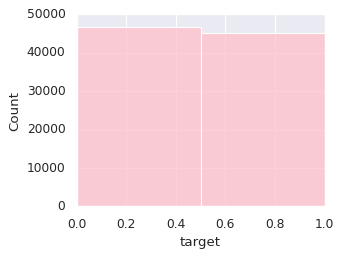

In [33]:
plt.style.use('classic')
sns.set(rc={'figure.figsize':(4,3)})
sns.histplot(trans_set['target'],color='pink',bins=2)

##Transactions data analyzing

###Changing codes of transactions according to days

In [34]:
fig = px.scatter(trans_set, x="day", y="code",trendline_color_override = '#CD5C5C',width=400, height=300)
fig.update_traces(marker_size=1,marker_color='#D2691E')
fig.update_layout(title='The ratio of codes by day', template='plotly_white')
fig.show()

###Changing types of transactions according to days

In [35]:
fig = px.scatter(trans_set, x="day", y="type",trendline_color_override = '#CD5C5C',width=400, height=300)
fig.update_traces(marker_size=1,marker_color='#00BFFF')
fig.update_layout(title='The ratio of types by day', template='plotly_white')
fig.show()

## Declaring the frequency of clients and there average bank visit time

In [36]:
trans_time = trans_set.groupby(['client_id'])['client_id','time','day'].mean()
trans_time['id'] = range(1, len(trans_time) + 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [37]:
client_repeated = trans_set.groupby(['client_id']).size().reset_index(name='counts')
client_repeated['id'] = range(1, len(trans_time) + 1)
client_repeated = client_repeated.drop(columns=['client_id'])

In [38]:
trans_time_new = trans_time.merge(client_repeated, left_on='id', right_on='id', how='inner')
trans_time_new = trans_time_new.drop(columns=['id'])
trans_time_new.sort_values('counts',ascending=False).head()

,client_id,time,day,counts
4203,70780820.0,9.544472,238.193734,2777
5188,87252636.0,13.183099,229.094567,497
4509,76043922.0,11.723542,225.399568,463
1681,29041434.0,9.674208,317.683258,442
3127,53854864.0,13.034211,236.584211,380


#Unsupervised learning

## Decision Tree

In [39]:
trans_set.head()

,client_id,code,type,day,time,target
0,96372458,6011,2010,421,6,0
1,96372458,6011,7010,270,6,0
2,96372458,4829,2370,97,10,0
3,96372458,4829,2330,445,7,0
4,96372458,4814,1030,4,9,0


In [40]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [41]:
X = trans_set[['code','type','day','time']].values
y = trans_set["target"].values

In [42]:
X

array([[6011, 2010,  421,    6],
       [6011, 7010,  270,    6],
       [4829, 2370,   97,   10],
       ...,
       [6011, 2010,  108,   11],
       [6011, 2010,   72,   14],
       [6011, 2010,  451,   10]])

In [43]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
#Cancer Data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [45]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


[Text(0.6510416666666666, 0.9375, '[6011 2010  307   20] <= 16.795\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.4270833333333333, 0.8125, '[6011 7010  101   11] <= 0.136\ngini = 0.161\nsamples = 284\nvalue = [25, 259]'),
 Text(0.22916666666666666, 0.6875, '[6010 7030  129    5] <= 1.048\ngini = 0.031\nsamples = 252\nvalue = [4, 248]'),
 Text(0.1875, 0.5625, '[5732 1110   48   10] <= 0.003\ngini = 0.024\nsamples = 251\nvalue = [3, 248]'),
 Text(0.08333333333333333, 0.4375, '[6011 7010  270    6] <= 19.9\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.041666666666666664, 0.3125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.125, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2916666666666667, 0.4375, '[6011 2010   55   13] <= 48.7\ngini = 0.016\nsamples = 247\nvalue = [2, 245]'),
 Text(0.20833333333333334, 0.3125, '[4814 1100  414    9] <= 33.35\ngini = 0.008\nsamples = 243\nvalue = [1, 242]'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsample

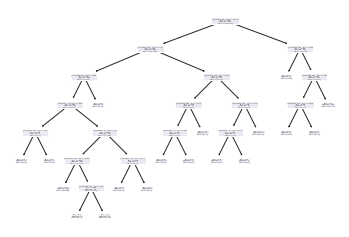

In [46]:
from sklearn.tree import plot_tree 
%matplotlib inline

plot_tree(tree, feature_names = X)

In [47]:
#Predict on the testing data, code = 6011, code = 2010, 
model = DecisionTreeClassifier(random_state=0)
model.fit(X, y)
test = np.array([[6011, 2010, 421, 6]])
model.predict(test)

array([0])

In [48]:
#The number of men with these parameters
trans_set[(trans_set["code"] == 6011) & (trans_set["type"] == 2010) & 
          (trans_set["day"] == 421) & (trans_set["time"] == 6) & (trans_set["target"] == 0)]

,client_id,code,type,day,time,target
0,96372458,6011,2010,421,6,0


In [49]:
#The number of women with these parameters
trans_set[(trans_set["code"] == 6011) & (trans_set["type"] == 2010) & 
          (trans_set["day"] == 421) & (trans_set["time"] == 6) & (trans_set["target"] == 1)]

,client_id,code,type,day,time,target


In [50]:
#prediction
y_pred = tree.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49  4]
 [ 5 85]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92        53
           1       0.96      0.94      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



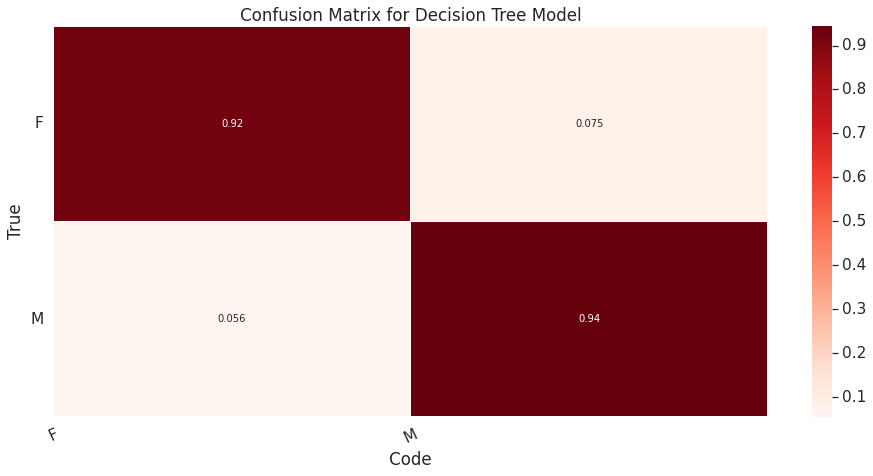

In [52]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

class_names = ['F', 'M']                
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Code')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [53]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [54]:
#fit logistic regression model to dataset
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#use logistic regression model to make predictions
y_score = classifier.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



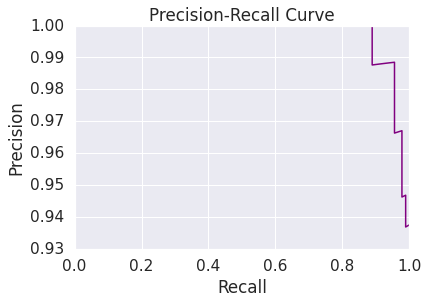

In [55]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

## K-nearest neighbors

### Choosing dataset to KNN analyzing

In [56]:
trans_knn = trans_set

In [57]:
trans_knn['target'] = trans_knn['target'].replace('M',0)
trans_knn['target'] = trans_knn['target'].replace('F',1)

In [58]:
X = trans_set[['code','type','day','time']].values
y = trans_set["target"].values

In [59]:
X

array([[6011, 2010,  421,    6],
       [6011, 7010,  270,    6],
       [4829, 2370,   97,   10],
       ...,
       [6011, 2010,  108,   11],
       [6011, 2010,   72,   14],
       [6011, 2010,  451,   10]])

In [60]:
y

array([0, 0, 0, ..., 0, 0, 1])

### Creating a train and test

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Finding of best K value

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

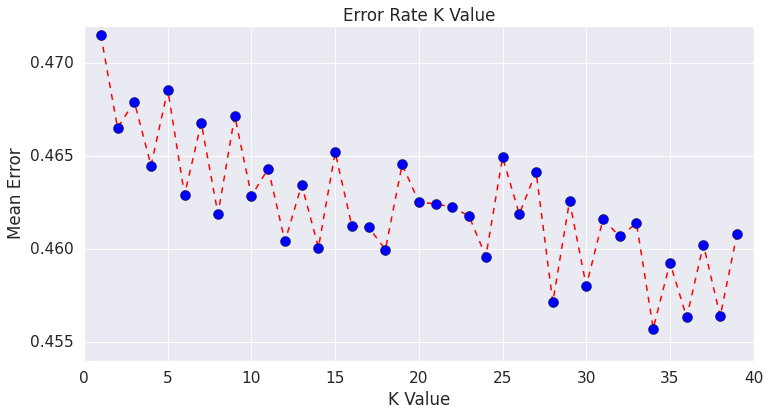

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### ROC curve

In [66]:
from sklearn.metrics import roc_curve

In [67]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [68]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

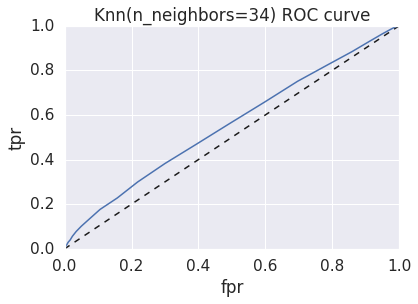

In [69]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=34) ROC curve')
plt.show()

In [70]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5553762953204334

### K nearest neighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=34)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=34)

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

In [74]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6199 3215]
 [5155 3797]]
              precision    recall  f1-score   support

           0       0.55      0.66      0.60      9414
           1       0.54      0.42      0.48      8952

    accuracy                           0.54     18366
   macro avg       0.54      0.54      0.54     18366
weighted avg       0.54      0.54      0.54     18366



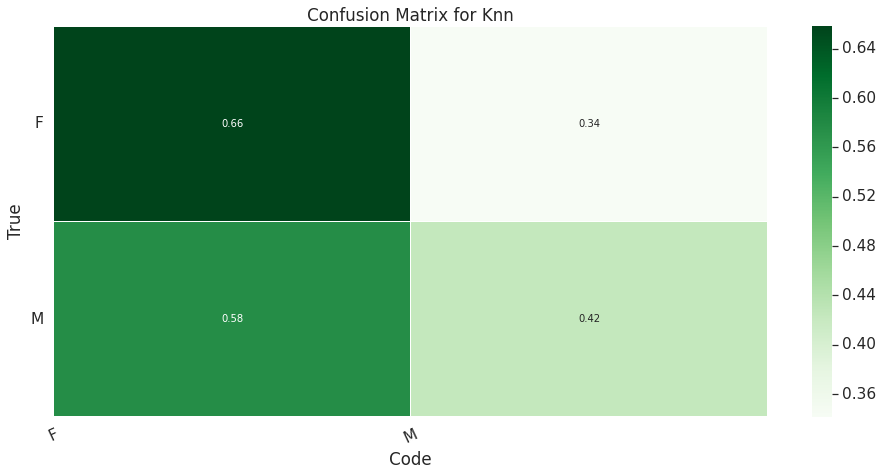

In [75]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['F', 'M']                
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Code')
plt.ylabel('True')
plt.title('Confusion Matrix for Knn')
plt.show()

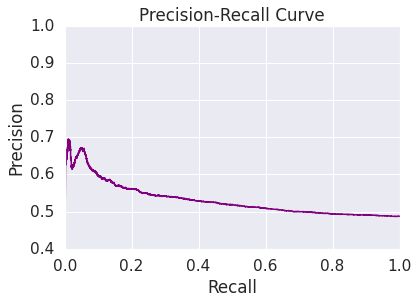

In [76]:
#fit logistic regression model to dataset
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#use logistic regression model to make predictions
y_score = classifier.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision reЯcall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

### Hyper

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
grid_params = { 'n_neighbors' : [5,10,15,20,26,31],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [79]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [80]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [81]:
g_res.best_score_

0.5397222824829773

In [82]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 31, 'weights': 'uniform'}

### Cross Validation

In [83]:
knn = KNeighborsClassifier(n_neighbors=34)

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')

In [86]:
print(scores)

[0.49700534 0.54056409 0.53207013 0.53359469 0.53228792 0.52847653
 0.52112829 0.54672185 0.53626661 0.52700937]


In [87]:
print(scores.mean())

0.5295124809552032


In [88]:
k_iterations = range(1,10)
k_scores = []

for k in k_iterations:
  knn = KNeighborsClassifier(n_neighbors=34)
  scores = cross_val_score(knn, X, y, cv = 20, scoring = 'accuracy')
  k_scores.append(scores.mean())

In [89]:
k_scores

[0.5393999759603891,
 0.5393999759603891,
 0.5393999759603891,
 0.5393999759603891,
 0.5393999759603891,
 0.5393999759603891,
 0.5393999759603891,
 0.5393999759603891,
 0.5393999759603891]

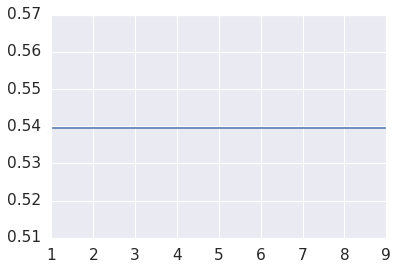

In [90]:
sns.lineplot(x = k_iterations, y = k_scores)

## Random Forest

In [91]:
trans_set[trans_set['target']==0]['type'].count()

46715

In [92]:
col=['code', 'type', 'day','time'] 

# код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
X=pd.DataFrame()
for i in col:
    if trans_set[i].dtype.name != 'object':
        X[i]=trans_set[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(trans_set[i])[0]

In [93]:
X.sample(3)

,code,type,day,time
88215,5411,1110,289,0
66105,4814,1030,28,12
33270,4829,4051,231,19


In [94]:
Y=trans_set['target'] #задаем значения для Y

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #используем train_test

In [96]:
model = RandomForestClassifier(n_estimators=100) #тренируем наш код для более точного результата
model.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
#выводим значение каждой колонки(цифры=проценты значения)
ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Significance of the attribute:")
ar_f.sort(reverse=True)
ar_f

Significance of the attribute:


[[0.739, 'day'], [0.1331, 'time'], [0.0769, 'code'], [0.0511, 'type']]

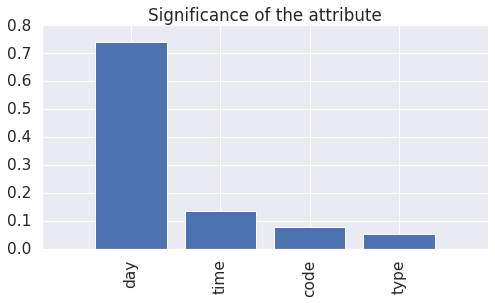

In [98]:
d_first = len(col)
plt.figure(figsize=(8,4))
plt.title("Significance of the attribute")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);
#наглядный вывод предыдущего кода

In [99]:
model.predict(X_test) #предсказание кода(тут все не выводиться так как слишком много значений)

array([1, 1, 0, ..., 0, 0, 1])

In [100]:
y_test #настоящие значения в таблице

23489    1
62273    0
70730    1
8827     0
41788    0
        ..
23875    0
3731     1
89998    0
65819    1
57833    1
Name: target, Length: 18366, dtype: int64

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))
#соотношение ошибок и правильных предсказаний

array([[5171, 4201],
       [4213, 4781]])

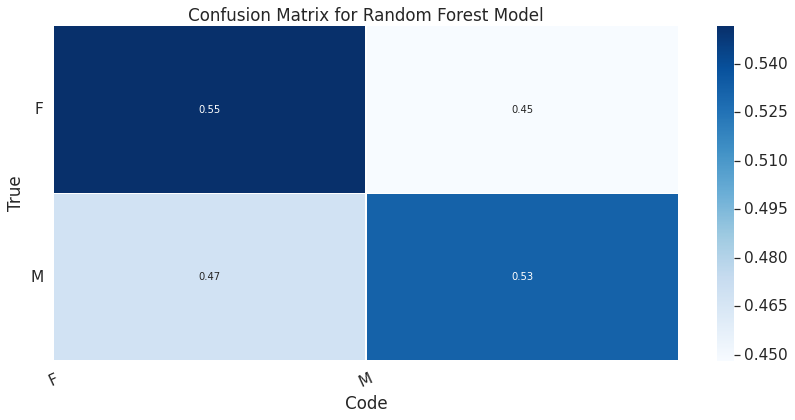

In [102]:
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(14,6))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

class_names = ['F', 'M']                
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Code')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

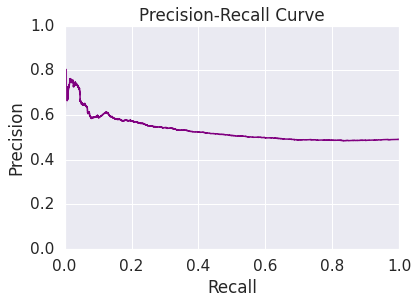

In [103]:
#fit logistic regression model to dataset
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#use logistic regression model to make predictions
y_score = classifier.predict_proba(X_test)[:, 1]
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#create precision reЯcall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

# Deep Analyzing

We have observed various algorithms and the background details of each algorithm we have seen. In this section, the performance aspects of each algorithm we are going to project.

The implementation of each algorithm involves the following steps as a template we can make use the same steps.

* Importing the libraries

* Importing the dataset

* Splitting the dataset into training and test set

* Feature scaling

* Training phase performance estimation

* Testing phase performance estimation.

In this article, we have to consider the dataset which involves the details of the cancer parameters like clump thinness, uniformity of cell shape, etc., so as to classify the cell as malignant or benign (Table 1).

The above results for this use case show that the decision tree algorithm outperforms when compared with the other two algorithms. The second highest performance we got for this example is 55 percentages in case of KNN.

The TP rate is 92 for decision tree, 55 in case of KNN and 54 in case of random forest. The False Negative is 42 in KNN, 94 in case of decision tree and 53 in case of random forest. Similarly, the TN value is 33 in case of KNN, 75 in case of decision tree and 45 in case of random forest.

| Model Name | Accuracy | TP | TN | FP | FN |
| --- | --- | --- | --- | --- | --- |
| Decision Tree | 0.94 | 0.92 | 0.075 | 0.056 | 0.94 |
| K-nearest neighbors | 0.55 | 0.67 | 0.33 | 0.58 | 0.42 |
| Random Forest | 0.54 | 0.55 | 0.45 | 0.47 | 0.53 |

#Conclusion